In [7]:
pip install tqdm

  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 78.3/78.3 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
#Set up the environment and upload the data
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep 
from tqdm.notebook import tqdm
import os
sns.set()

In [10]:
#Dataset that should go with Alzheimer label
very_mild = glob(r'C:\Users\Dell\Desktop\Dataset\Very_Mild_Demented\*')
mild = glob(r'C:\Users\Dell\Desktop\Dataset\Mild_Demented\*')
moderate = glob(r'C:\Users\Dell\Desktop\Dataset\Moderate_Demented\*')

#Dataset without Alzheimer
non = glob(r'C:\Users\Dell\Desktop\Dataset\Non_Demented\*')

C:\Users\Dell\Desktop\Dataset\Non_Demented\non_10.jpg
One of the data in Non Alzheimer Folder
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

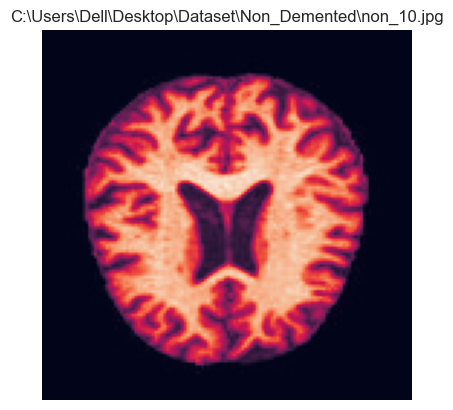

In [11]:
print(non[1])
def view_image(directory):
    img = mpimg.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img

print('One of the data in Non Alzheimer Folder')
view_image(non[1])

Alzheimer Patient's Brain
Image shape:(128, 128)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

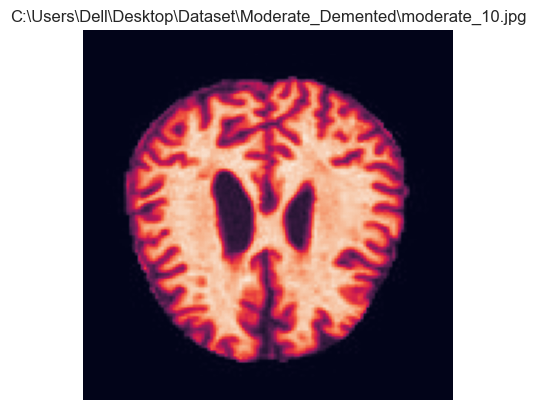

In [12]:
print('Alzheimer Patient\'s Brain')
view_image(moderate[1])

### SVM for Alzheimer Detection

In [13]:
resized_image_array=[]
resized_image_array_label=[]
width = 256
height = 256
new_size = (width,height) 
def resizer(image_directory):
    for file in image_directory:
        img = Image.open(file) 
        img = img.resize(new_size)
        array_temp = np.array(img)
        shape_new = width*height
        img_wide = array_temp.reshape(1, shape_new)
        resized_image_array.append(img_wide[0])
        if image_directory == non:
            resized_image_array_label.append(0)
        else:
            resized_image_array_label.append(1)
ALZ = very_mild + mild + moderate
resizer(non)
resizer(ALZ)



In [14]:
print(len(non))
print(len(ALZ))
print(len(resized_image_array))
print(resized_image_array[1])
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(resized_image_array, resized_image_array_label, test_size = 0.2)


3200
3200
6400
[0 0 0 ... 0 0 0]


In [ ]:
clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)
y_pred = clf.predict(train_x)
y_true = train_y

print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

y_pred = clf.predict(test_x)
y_true = test_y

print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred)) 

In [22]:

clf = svm.SVC(kernel = 'linear')
clf.fit(train_x, train_y)

y_pred = clf.predict(train_x)
y_true = train_y

print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

y_pred = clf.predict(test_x)
y_true = test_y

print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Accuracy :  0.8931640625
Precision :  0.8814199395770392
Recall :  0.9092325671990651
f1 :  0.8951102588686481
Confusion matrix : [[2239  314]
 [ 233 2334]]
Accuracy :  0.86171875
Precision :  0.8433734939759037
Recall :  0.8846761453396524
f1 :  0.8635312259059369
Confusion matrix : [[543 104]
 [ 73 560]]
